# Problem Statement:
You have to analyze 2 decades of the Nifty 50 index in the Indian Stock Market and come up with strategies to invest for higher returns in the future.
# Objective:
Your objective is to analyze the data and come up with strategies to build a portfolio that will bring the maximum yield. [Link to the Dataset](https://www.kaggle.com/datasets/rohanrao/nifty50-stock-market-data)
# About Dataset
Context
Stock market data is widely analyzed for educational, business and personal interests.

# Content
The data is the price history and trading volumes of the fifty stocks in the index NIFTY 50 from NSE (National Stock Exchange) India. All datasets are at a day-level with pricing and trading values split across .cvs files for each stock along with a metadata file with some macro-information about the stocks itself. The data spans from 1st January, 2000 to 30th April, 2021.

# Update Frequency
Since new stock market data is generated and made available every day, in order to have the latest and most useful information, the dataset will be updated once a month.


# Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder,MinMaxScaler
import duckdb as db
con = db.connect()

# Load the dataset

In [2]:
df = pd.read_csv('NIFTY50_all.csv')
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2007-11-27,MUNDRAPORT,EQ,440.00,770.00,1050.00,770.0,959.0,962.90,984.72,27294366,2.687719e+15,NaN,9859619.0,0.3612
1,2007-11-28,MUNDRAPORT,EQ,962.90,984.00,990.00,874.0,885.0,893.90,941.38,4581338,4.312765e+14,NaN,1453278.0,0.3172
2,2007-11-29,MUNDRAPORT,EQ,893.90,909.00,914.75,841.0,887.0,884.20,888.09,5124121,4.550658e+14,NaN,1069678.0,0.2088
3,2007-11-30,MUNDRAPORT,EQ,884.20,890.00,958.00,890.0,929.0,921.55,929.17,4609762,4.283257e+14,NaN,1260913.0,0.2735
4,2007-12-03,MUNDRAPORT,EQ,921.55,939.75,995.00,922.0,980.0,969.30,965.65,2977470,2.875200e+14,NaN,816123.0,0.2741


# Shape of the original dataset

In [3]:
df.shape

(235192, 15)

# Identify the null values

In [4]:
#double-check whether the null values are present
df.columns[df.isnull().any()]

Index(['Trades', 'Deliverable Volume', '%Deliverble'], dtype='object')

# Check for duplicates

In [5]:
df.duplicated().sum()

0

# Inspect datatypes

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235192 entries, 0 to 235191
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Date                235192 non-null  object 
 1   Symbol              235192 non-null  object 
 2   Series              235192 non-null  object 
 3   Prev Close          235192 non-null  float64
 4   Open                235192 non-null  float64
 5   High                235192 non-null  float64
 6   Low                 235192 non-null  float64
 7   Last                235192 non-null  float64
 8   Close               235192 non-null  float64
 9   VWAP                235192 non-null  float64
 10  Volume              235192 non-null  int64  
 11  Turnover            235192 non-null  float64
 12  Trades              120344 non-null  float64
 13  Deliverable Volume  219115 non-null  float64
 14  %Deliverble         219115 non-null  float64
dtypes: float64(11), int64(1), object(3

# Pickup the required fields

In [7]:
query_01="""SELECT Date
    , Symbol
    , "Prev Close"
    , Open
    , High
    , Low
    , Last
    , Close
    , Volume
    , VWAP
    , Turnover
FROM df
--where Symbol='INFY'
"""
data = con.execute(query_01).df()

data.head()

,Date,Symbol,Prev Close,Open,High,Low,Last,Close,Volume,VWAP,Turnover
0,2007-11-27,MUNDRAPORT,440.00,770.00,1050.00,770.0,959.0,962.90,27294366,984.72,2.687719e+15
1,2007-11-28,MUNDRAPORT,962.90,984.00,990.00,874.0,885.0,893.90,4581338,941.38,4.312765e+14
2,2007-11-29,MUNDRAPORT,893.90,909.00,914.75,841.0,887.0,884.20,5124121,888.09,4.550658e+14
3,2007-11-30,MUNDRAPORT,884.20,890.00,958.00,890.0,929.0,921.55,4609762,929.17,4.283257e+14
4,2007-12-03,MUNDRAPORT,921.55,939.75,995.00,922.0,980.0,969.30,2977470,965.65,2.875200e+14


# Apply One-hot encoding

In [8]:
encoder = OneHotEncoder() # Create a OneHotEncoder instance
encoded_data = encoder.fit_transform(data[['Symbol']]) # Fit and transform the 'Symbol' column
encoded_df = pd.DataFrame(encoded_data.toarray(), columns=encoder.get_feature_names_out(['Symbol'])) # Convert the encoded data to a DataFrame
data = pd.concat([data.drop('Symbol', axis=1), encoded_df], axis=1) # Concatenate the encoded DataFrame with the original DataFrame (excluding the original 'Symbol' column)

# Convert the 'Date' column to datetime format
data['Date'] = pd.to_datetime(df['Date'])

# Set the 'Date' column as the index
data.set_index('Date', inplace=True)

data.head()


,Prev Close,Open,High,Low,Last,Close,Volume,VWAP,Turnover,Symbol_ADANIPORTS,...,Symbol_TISCO,Symbol_TITAN,Symbol_ULTRACEMCO,Symbol_UNIPHOS,Symbol_UPL,Symbol_UTIBANK,Symbol_VEDL,Symbol_WIPRO,Symbol_ZEEL,Symbol_ZEETELE
Date,,,,,,,,,,,,,,,,,,,,,
2007-11-27,440.00,770.00,1050.00,770.0,959.0,962.90,27294366,984.72,2.687719e+15,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2007-11-28,962.90,984.00,990.00,874.0,885.0,893.90,4581338,941.38,4.312765e+14,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2007-11-29,893.90,909.00,914.75,841.0,887.0,884.20,5124121,888.09,4.550658e+14,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2007-11-30,884.20,890.00,958.00,890.0,929.0,921.55,4609762,929.17,4.283257e+14,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2007-12-03,921.55,939.75,995.00,922.0,980.0,969.30,2977470,965.65,2.875200e+14,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 235192 entries, 2007-11-27 to 2021-04-30
Data columns (total 74 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Prev Close         235192 non-null  float64
 1   Open               235192 non-null  float64
 2   High               235192 non-null  float64
 3   Low                235192 non-null  float64
 4   Last               235192 non-null  float64
 5   Close              235192 non-null  float64
 6   Volume             235192 non-null  int64  
 7   VWAP               235192 non-null  float64
 8   Turnover           235192 non-null  float64
 9   Symbol_ADANIPORTS  235192 non-null  float64
 10  Symbol_ASIANPAINT  235192 non-null  float64
 11  Symbol_AXISBANK    235192 non-null  float64
 12  Symbol_BAJAJ-AUTO  235192 non-null  float64
 13  Symbol_BAJAJFINSV  235192 non-null  float64
 14  Symbol_BAJAUTOFIN  235192 non-null  float64
 15  Symbol_BAJFINANCE  235192 non-null 

# Statistical Summary

In [10]:
data.describe()

,Prev Close,Open,High,Low,Last,Close,Volume,VWAP,Turnover,Symbol_ADANIPORTS,...,Symbol_TISCO,Symbol_TITAN,Symbol_ULTRACEMCO,Symbol_UNIPHOS,Symbol_UPL,Symbol_UTIBANK,Symbol_VEDL,Symbol_WIPRO,Symbol_ZEEL,Symbol_ZEETELE
count,235192.000000,235192.000000,235192.000000,235192.000000,235192.000000,235192.000000,2.351920e+05,235192.00000,2.351920e+05,235192.000000,...,235192.000000,235192.000000,235192.000000,235192.000000,235192.00000,235192.000000,235192.000000,235192.000000,235192.000000,235192.000000
mean,1266.196349,1267.759708,1286.581440,1247.488465,1266.388302,1266.554351,3.045903e+06,1267.13230,1.610138e+14,0.009775,...,0.006186,0.022560,0.017603,0.010328,0.00790,0.008130,0.006301,0.022560,0.014924,0.007636
std,2581.370320,2585.259609,2619.649216,2546.621396,2581.392543,2582.140942,7.333981e+06,2582.69998,3.298085e+14,0.098384,...,0.078410,0.148497,0.131502,0.101100,0.08853,0.089797,0.079130,0.148497,0.121249,0.087052
min,0.000000,8.500000,9.750000,8.500000,9.100000,9.150000,3.000000e+00,9.21000,1.047000e+07,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,274.300000,275.000000,279.500000,269.600000,274.400000,274.350000,2.190095e+05,274.69750,1.612816e+13,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,566.500000,567.025000,576.900000,556.500000,567.000000,566.700000,1.010938e+06,566.94000,6.832603e+13,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1242.200000,1243.312500,1263.000000,1221.650000,1242.900000,1242.400000,3.019851e+06,1242.66250,1.863835e+14,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
max,32861.950000,33399.950000,33480.000000,32468.100000,32849.000000,32861.950000,4.810589e+08,32975.24000,3.564334e+16,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


# Close Price Over Time

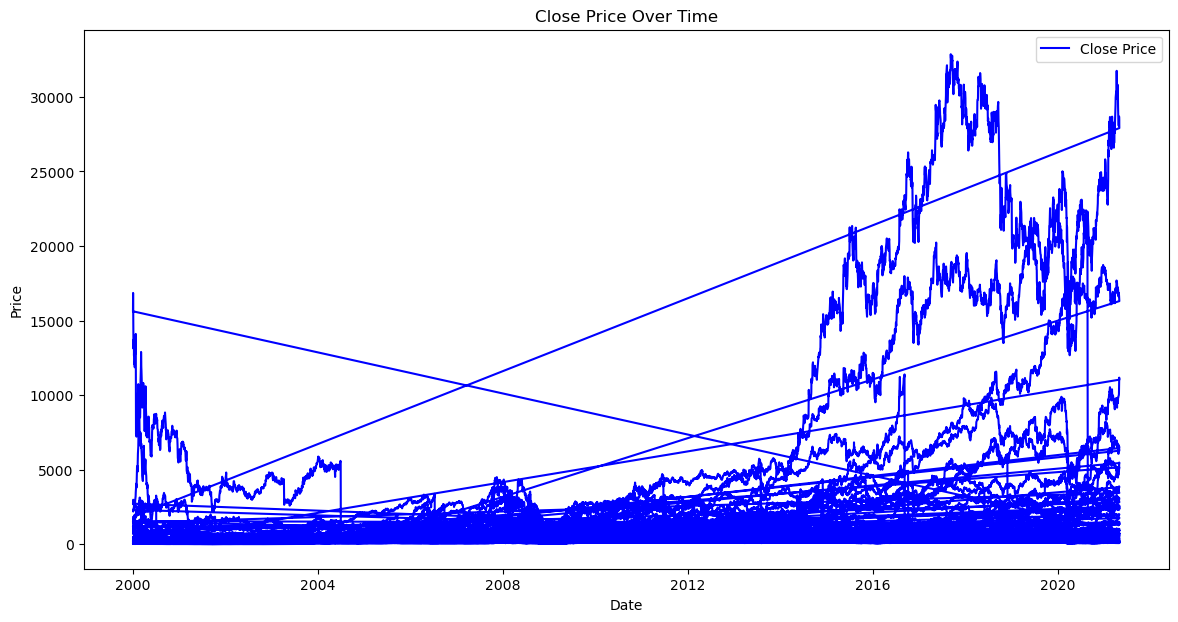

In [11]:

plt.figure(figsize=(14, 7))
plt.plot(data['Close'], label='Close Price', color='blue')
plt.title('Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


# Correlation Analysis

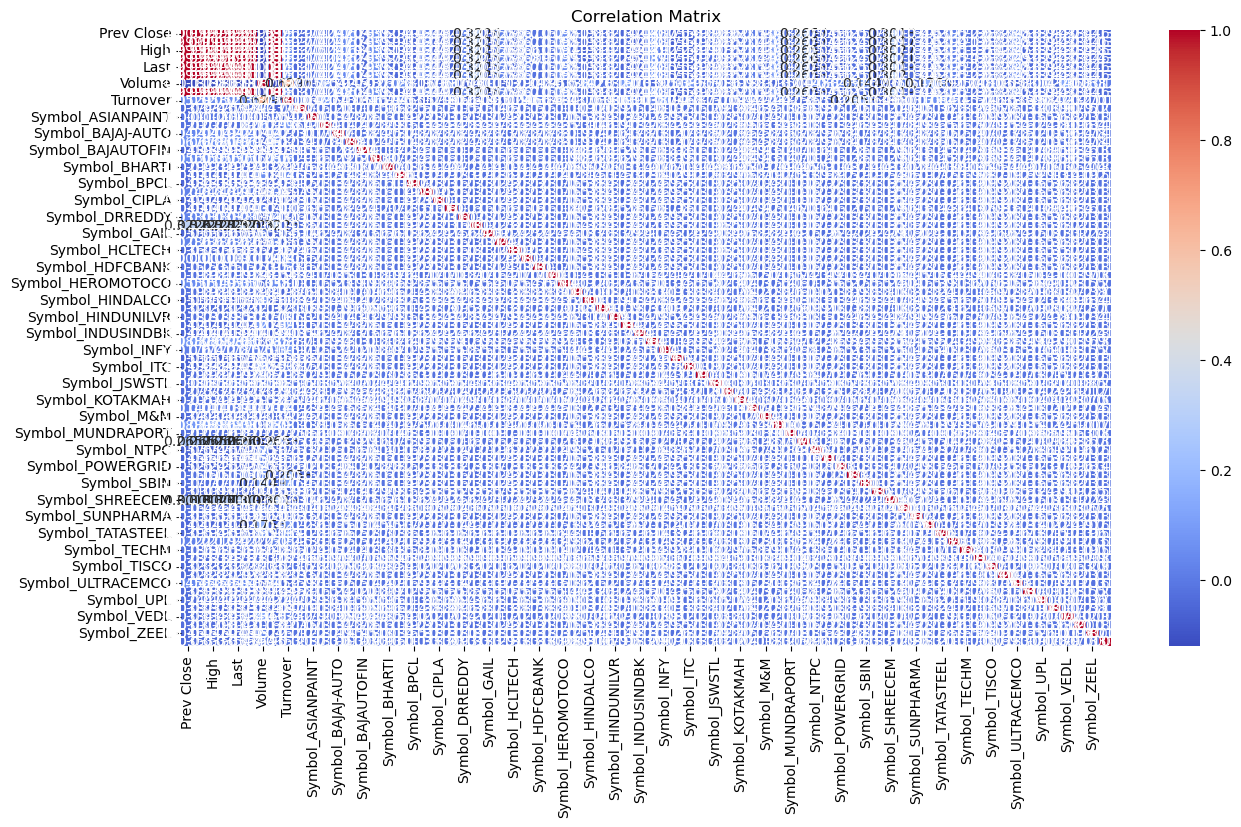

In [12]:
# Calculate the correlation matrix
correlation_matrix = data.corr()

# Plot the correlation matrix
plt.figure(figsize=(15, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".4f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


# Building the mini-correlation matrix

In [13]:
# Set benchmark for features correlation significance (60%) with target

corr_features = correlation_matrix["Close"].abs() >= 0.60
corr_features.value_counts()
# Get list of names for features passing the benchmark 
feature_names = list(corr_features[corr_features].index)

feature_names

['Prev Close', 'Open', 'High', 'Low', 'Last', 'Close', 'VWAP']

# Heatmap observing the significant correlation

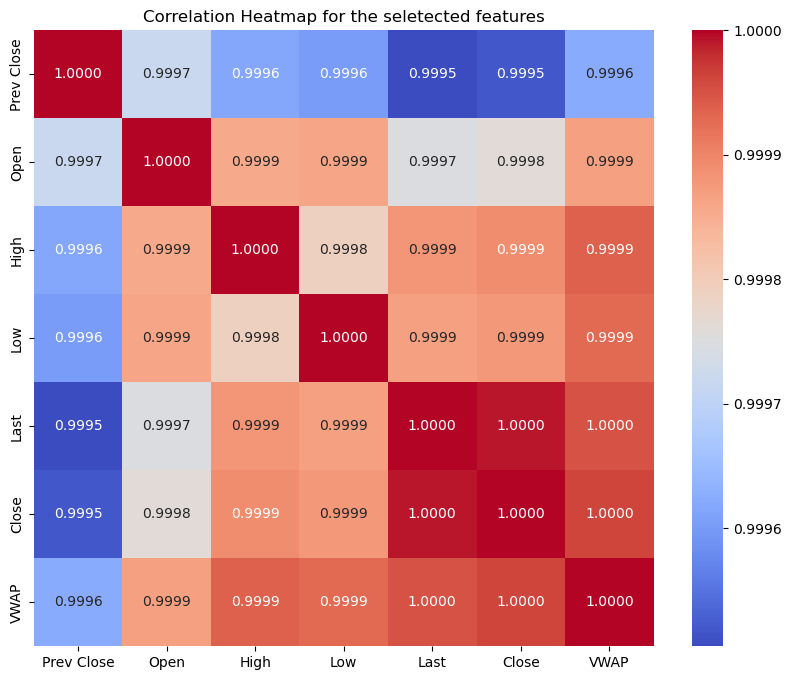

In [14]:
# Create mini correlation matrix
mini_corr_matrix = data[feature_names].corr()
# Generate the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(mini_corr_matrix, annot = True, fmt='.4f', cmap="coolwarm")
plt.title("Correlation Heatmap for the seletected features")
plt.show()

# Plot the relationship with target feature

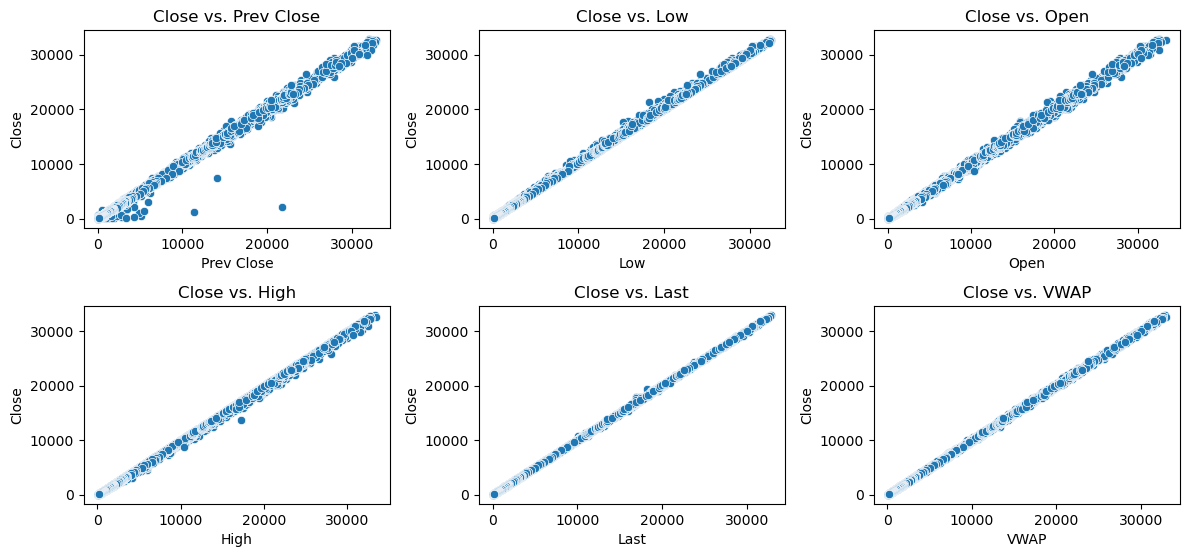

In [15]:

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Scatter plot for Close vs. Prev Close
plt.subplot(3, 3, 1)
sns.scatterplot(data=data[feature_names], x='Prev Close', y='Close')
plt.title('Close vs. Prev Close')

# Scatter plot for Close vs. Low
plt.subplot(3, 3, 2)
sns.scatterplot(data=data[feature_names], x='Low', y='Close')
plt.title('Close vs. Low')

# Scatter plot for Close vs. Open
plt.subplot(3, 3, 3)
sns.scatterplot(data=data[feature_names], x='Open', y='Close')
plt.title('Close vs. Open')

# Scatter plot for Close vs. High
plt.subplot(3, 3, 4)
sns.scatterplot(data=data[feature_names], x='High', y='Close')
plt.title('Close vs. High')

# Scatter plot for Close vs. Last
plt.subplot(3, 3, 5)
sns.scatterplot(data=data[feature_names], x='Last', y='Close')
plt.title('Close vs. Last')

# Scatter plot for Close vs. VWAP
plt.subplot(3, 3, 6)
sns.scatterplot(data=data[feature_names], x='VWAP', y='Close')
plt.title('Close vs. VWAP')


plt.tight_layout()
plt.show()

# 

In [16]:
from sklearn.model_selection import train_test_split

scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X=data[['Prev Close', 'Open', 'High', 'Low', 'Last', 'VWAP']]
y=data['Close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) # Split data into training and testing sets

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1))

# Reshape X for LSTM (samples, timesteps, features)
X_train_scaled = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_scaled = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

print(f"X_train.shape: {X_train_scaled.shape}")
print(f"y_train.shape: {y_train_scaled.shape}")
print(X_train.shape[1])

print(X_train_scaled.shape[1], X_train_scaled.shape[2])

X_train.shape: (164634, 1, 6)
y_train.shape: (164634, 1)
6
1 6


# Create the model

In [17]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense,Input,Dropout

timeseries_model = Sequential()
timeseries_model.add(Input(shape=(X_train_scaled.shape[1], X_train_scaled.shape[2])))  # Input shape must match the number of features in X_train
timeseries_model.add(LSTM(250, activation='relu'))
timeseries_model.add(Dropout(0.3))
timeseries_model.add(Dense(1))

timeseries_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 250)            │       257,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 250)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           251 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 257,251 (1004.89 KB)

 Trainable params: 257,251 (1004.89 KB)

 Non-trainable params: 0 (0.00 B)

# Model Compilation

In [18]:
from tensorflow.keras.optimizers import Adam
timeseries_model.compile(optimizer=Adam(learning_rate=0.0001), loss='mse', metrics=['mse'])

# Stop Overtraining:

In [19]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model

In [20]:
history = timeseries_model.fit(X_train_scaled, y_train_scaled, epochs=400, batch_size=128, validation_data=(X_test_scaled, y_test_scaled), callbacks=[early_stopping])

Epoch 1/400
1287/1287 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - loss: 0.0027 - mse: 0.0027 - val_loss: 7.7037e-06 - val_mse: 7.7037e-06
Epoch 2/400
1287/1287 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - loss: 6.0794e-05 - mse: 6.0794e-05 - val_loss: 7.4001e-06 - val_mse: 7.4001e-06
Epoch 3/400
1287/1287 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - loss: 4.7672e-05 - mse: 4.7672e-05 - val_loss: 5.1486e-06 - val_mse: 5.1486e-06
Epoch 4/400
1287/1287 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - loss: 4.3230e-05 - mse: 4.3230e-05 - val_loss: 3.8055e-06 - val_mse: 3.8055e-06
Epoch 5/400
1287/1287 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - loss: 4.1175e-05 - mse: 4.1175e-05 - val_loss: 3.1332e-06 - val_mse: 3.1332e-06
Epoch 6/400
1287/1287 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - loss: 3.9578e-05 - mse: 3.9578e-05 - val_loss: 3.4146e-06 - val_mse: 3.4146e-06
Epoch 7/400
1287/1287 ━━━━━━━━━━━━━━━━━━━━ 19s 9ms/step - loss: 3.8618e-05 - mse: 3.8618e-05 - val_loss: 3.1055e-06 - val_mse: 3.1055e-06
Epoch 8/400
1287/1287 ━━━━━━━━━━━━━━━━━━━━

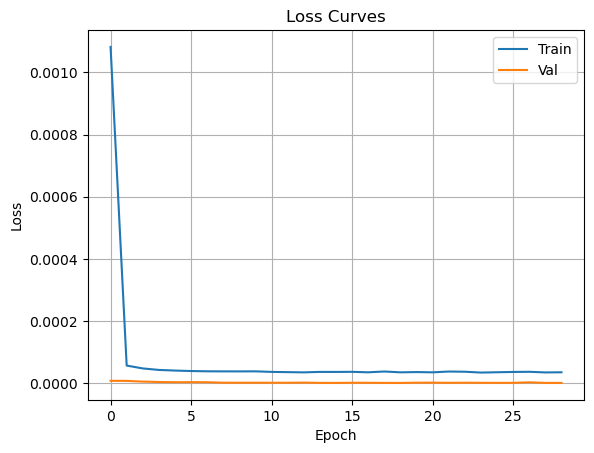

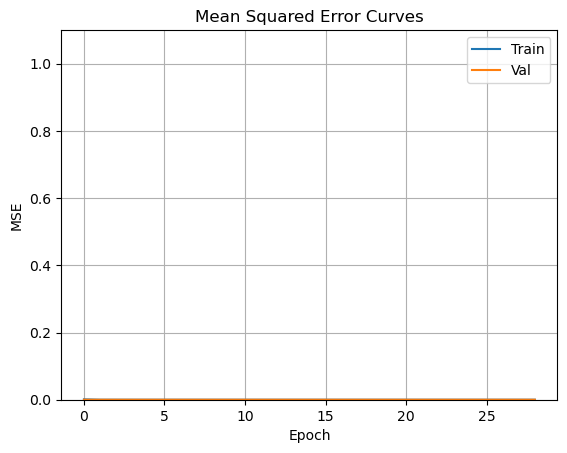

In [21]:
#Track accuracy
train_loss = history.history["loss"]
val_loss = history.history["val_loss"]

train_mean_squared_error = history.history["mse"]
val_mean_squared_error = history.history["val_mse"]

plt.plot(train_loss)
plt.plot(val_loss)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss Curves")
plt.legend(["Train", "Val"])
plt.grid()
plt.show()

plt.plot(train_mean_squared_error)
plt.plot(val_mean_squared_error)
plt.xlabel("Epoch")
plt.ylabel("MSE")
plt.ylim(0,1.1)
plt.title("Mean Squared Error Curves")
plt.legend(["Train", "Val"])
plt.grid()
plt.show()

# Make predictions

In [22]:
predicted_scaled = timeseries_model.predict(X_test_scaled)

# Inverse transform predictions and actual values
predicted = scaler_y.inverse_transform(predicted_scaled)
y_test_original = scaler_y.inverse_transform(y_test_scaled)


2205/2205 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step


# Evaluate the model

In [23]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test_original, predicted)
mae = mean_absolute_error(y_test_original, predicted)
r2 = r2_score(y_test_original, predicted)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R² Score: {r2}")


Mean Squared Error: 982.300643966351
Mean Absolute Error: 11.02215451900913
R² Score: 0.9998502405117659


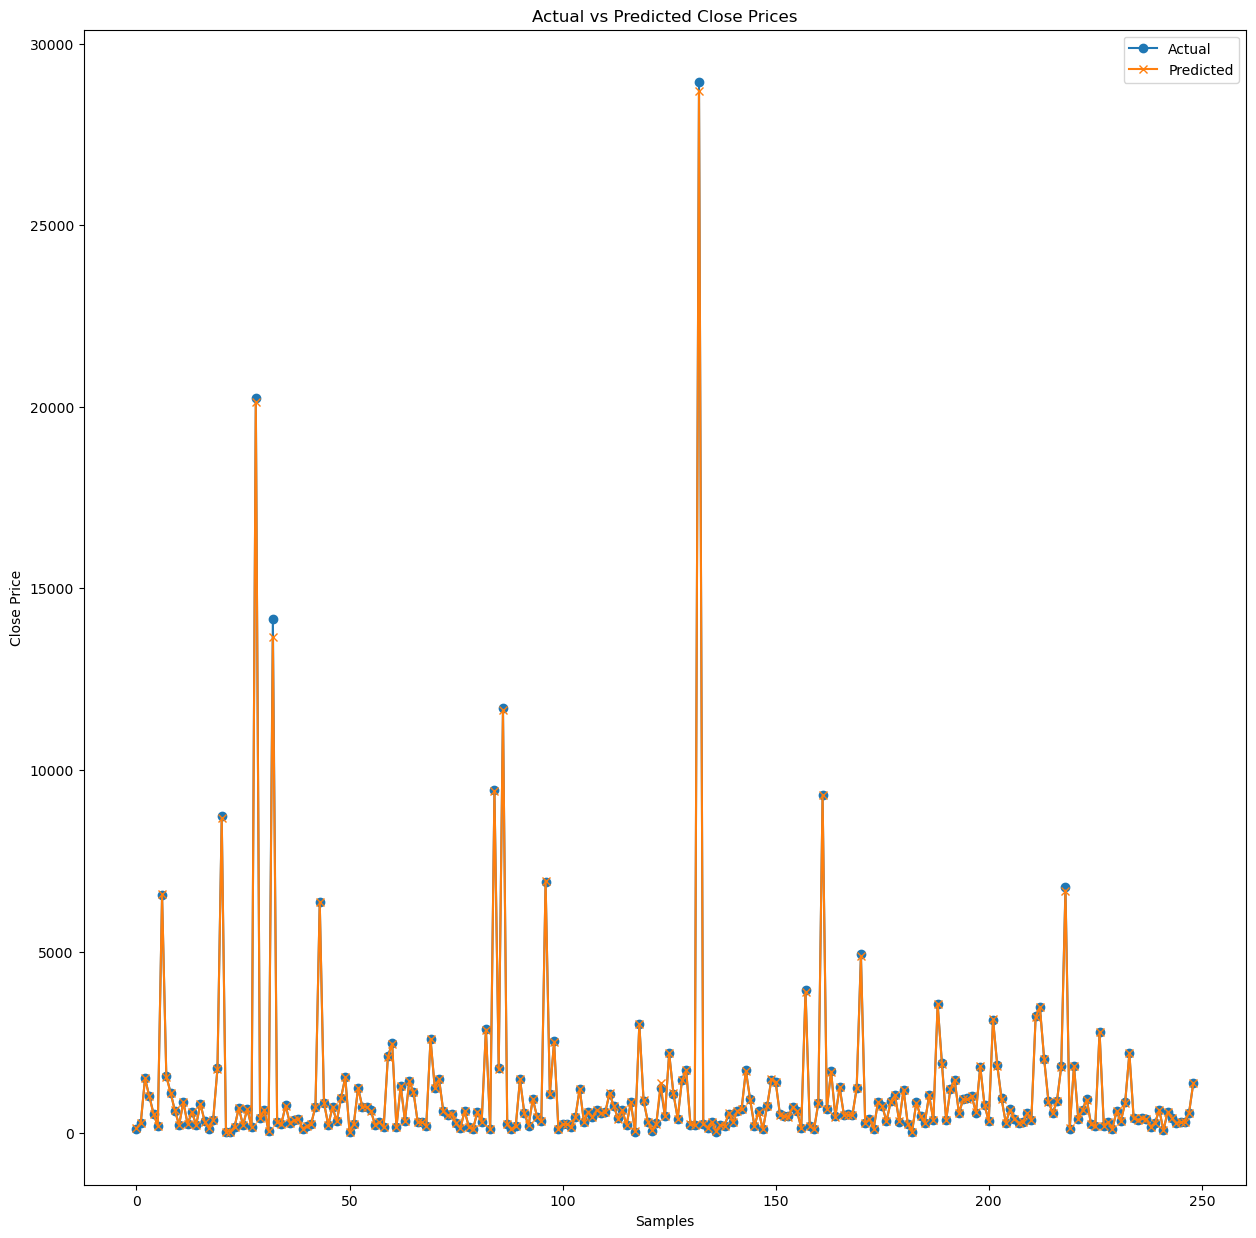

In [24]:

plt.figure(figsize=(15, 15))
plt.plot(y_test_original[1:250], marker='o', label='Actual')
plt.plot(predicted[1:250], marker='x', label='Predicted')
plt.legend()
plt.title('Actual vs Predicted Close Prices')
plt.xlabel('Samples')
plt.ylabel('Close Price')
plt.show()


# Conclusion:

1. The target feature "Close" is linearly dependent on the independent variables 'Prev Close', 'Open', 'High', 'Low', 'Last', 'VWAP'.
2. LSTM model is appropriate instead of using traditional time series models.